In [2]:
!kaggle datasets download -d lespin/house-prices-dataset

Dataset URL: https://www.kaggle.com/datasets/lespin/house-prices-dataset
License(s): CC0-1.0
  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 50.6MB/s]


In [3]:
import pandas as pd
import numpy as np
import os
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [4]:
# Define the file path and extraction directory
zip_file_path = '/content/house-prices-dataset.zip'
extract_dir = '/content/house-prices-dataset'

# Create a directory to extract files to (if it doesn't already exist)
os.makedirs(extract_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Verify the extracted files
extracted_files = os.listdir(extract_dir)
print("Extracted files:", extracted_files)

Extracted files: ['data_description.txt', 'sample_submission.csv', 'test.csv', 'train.csv']


In [5]:
# Load the data
df = pd.read_csv(f'{extract_dir}/train.csv')
df_test = pd.read_csv(f'{extract_dir}/test.csv')

In [6]:
# Check the column names in the training DataFrame
print(df.columns)

# Check the column names in the test DataFrame
print(df_test.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

   Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0 -0.207142            7            5       2003   
1   2          20         80.0 -0.091886            6            8       1976   
2   3          60         68.0  0.073480            7            5       2001   
3   4          70         60.0 -0.096897            7            5       1915   
4   5          60         84.0  0.375148            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  SaleType_ConLw  \
0          2003       196.0         706  ...           False           False   
1          1976         0.0         978  ...           False           False   
2          2002       162.0         486  ...           False           False   
3          1970         0.0         216  ...           False           False   
4          2000       350.0         655  ...           False           False   

   SaleType_New  SaleType_Oth  S

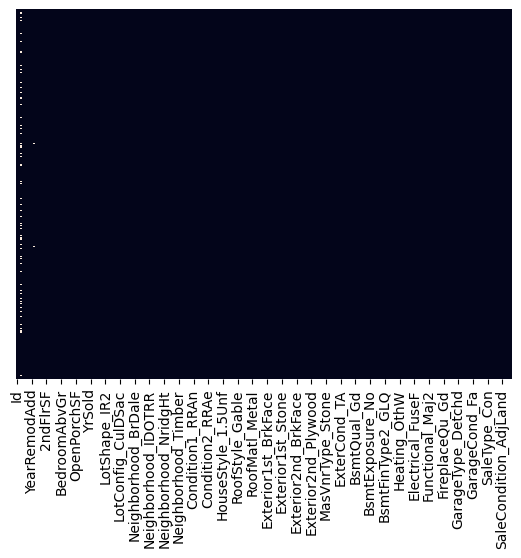

In [16]:
# Explore the data
print(df.head())
print(df.isnull().sum())
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
plt.show()

In [18]:
columns_to_drop = ['Alley', 'GarageYrBlt', 'PoolQC', 'Fence', 'MiscFeature']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1)
df_test = df_test.drop(columns=[col for col in columns_to_drop if col in df_test.columns], axis=1)


In [9]:
# Fill missing values
columns_with_null = df.columns[df.isnull().any()]
null_counts = df[columns_with_null].isnull().sum()
print(null_counts)


LotFrontage     259
MasVnrType      872
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64


In [43]:
# Fill missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
X = pd.DataFrame(X, columns=df[features].columns)

X_test = imputer.transform(df_test[features])
X_test = pd.DataFrame(X_test, columns=df_test[features].columns)

In [44]:
# Verify that all missing values have been handled
print(df.isnull().sum().sum())

0


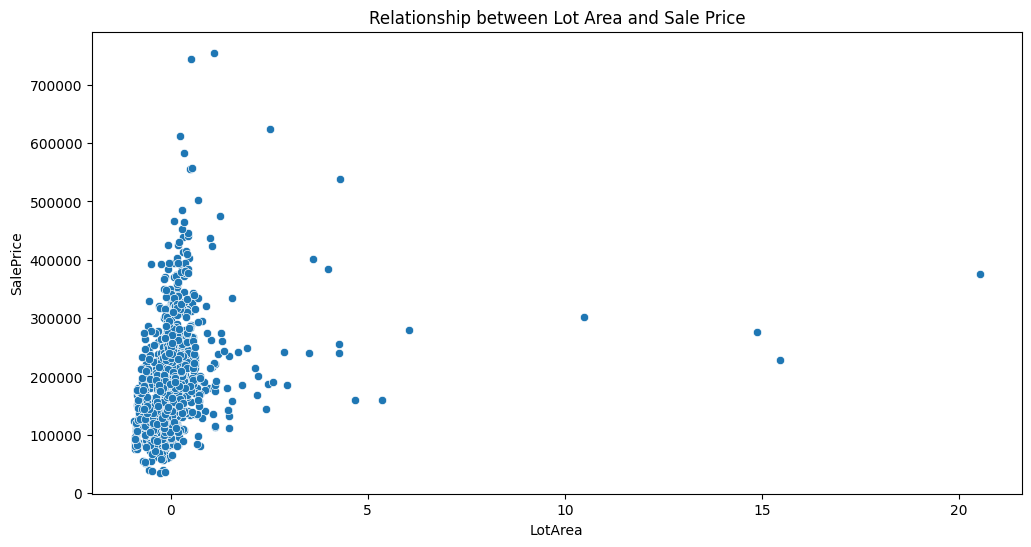

In [32]:
# Explore the relationship between features and the target variable
plt.figure(figsize=(12, 6))
sns.scatterplot(x='LotArea', y='SalePrice', data=df)
plt.title('Relationship between Lot Area and Sale Price')
plt.show()

In [33]:
# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)
df_test = pd.get_dummies(df_test, drop_first=True)

In [45]:
# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)


In [35]:
# Feature selection
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'

X = df[features]
y = df[target]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Evaluate the model on the validation set
y_val_pred = model.predict(X_val)
r2 = r2_score(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
print(f"R-squared: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

R-squared: 0.63
Mean Squared Error: 2806426667.25
